<a href="https://colab.research.google.com/github/CamiloCastellanos/ClasificacionNumeros/blob/main/ClasificacionNumeros/Redes%20Neuronales%20Convolucionales/Clasificaci%C3%B3n_N%C3%BAmeros_Red_Neuronal_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Convolucionales



## Definición

Las redes neuronales convolucionales son la solución al problema de clasificación de imágenes, esto se debe a con esta red neuronal tratamos de emular la manera en que los seres humanos podemos ver (Corteza visual)

En este caso lo que hacemos es imitar a dos neuronas la simple y la compleja.

- La simple se puede definir aquella que solo da respuesta cuando encuentra/visualiza una característica en concreto.
- La compleja recopila la información de varias neuronas simples para formar un objeto un poco más complejo en cuanto a forma. 

Ya en el caso de la red neuronal lo que hacemos es adicionar dos capas más a nuestro modelo:

- Capa de convolución (neurona simple)
- Capa de agrupación (neurona compleja)



![Corteza Visual](https://upload.wikimedia.org/wikipedia/commons/9/9d/BA17%2C18%2C19_-_Visual_cortex_%28V1%2C_V2%2C_V3%29_-_animation.gif)





### Red Neuronal VS Red Neuronal Convolucional

#### ¿Porque es mejor una red neuronal convolucional que una red neuronal para la clasificación de imágenes?

La razón del porque se utiliza una red neuronal convolucional y no una red neuronal tradicional para la clasificación de imágenes, se debe a que una red neuronal nos puede ayudar a realizar la clasificación pero está limitada por el data set que se utilizo para el entrenamiento, dado que si un elemento con el que lo entrenamos lo cambiamos de posición, tamaño o rotación este puede que no nos de el resultado deseado, incluso si le pasamos una nueva imagen puede ocurrir lo mismo, esto se debe a que la red neuronal se establece con una entrada de unas características en el caso de las imágenes no podríamos evaluar pixel a pixel para saber el estado de una imagen o establecer unas características muy rigurosas.

![Robot](https://pics.me.me/confirm-that-youre-not-a-robot-im-not-a-robot-39474105.png)



### Convolucion

Este proceso se puede definir la transformación de dos funciones para la generación de una tercera la cual se podría ver como la superposición de la primera función sobre la segunda la cual es una versión trasladada e invertida de la segunda función

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Convolucion_de_entrada_con_respuesta_al_impulso.gif/250px-Convolucion_de_entrada_con_respuesta_al_impulso.gif)

W2 = (W1−F+2P)/S+1
W 2 = ( W 1 − F + 2 P ) / S + 1

H2 = (H1−F+2P)/S+1
H 2 = ( H 1 − F + 2 P ) / S + 1

W1 W 1 Es el ancho de la imagen antes de la convolución;

W2 W 2 Es el ancho del mapa de características después de la convolución;

H1 H 1 Es la altura de la imagen antes de la convolución;

H2 H 2 Es la altura del mapa de características después de la convolución;

P P Es la cantidad de relleno;

S S Es el tamaño del paso de zancada.

En el caso de la red neuronal 

![](https://programmerclick.com/images/641/570e0901a6e7e093ac743bdc95a3a319.gif)

![MINST DATASET](https://pochocosta.com/wp-content/uploads/2019/10/Typical_cnn-1024x315.png)

## Ejercicio clasificación de números

En este ejemplo veremos una red neuronal convolucional implementada a la clasificación de números escritos a mano, también veremos una manera de realizar exportación del modelo para implementarlo en una pagina web la cual nos ayudara a verificar que tan entrenado esta nuestro modelo.


### DATA SET - MINST

En este conjunto de datos nos podemos encontrar la digitalización de unas imágenes las cuales representan dígitos numéricos escritos a mano.


![MINST DATASET](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

### Desarrollo

In [ ]:
# La Fuente es el canal de Youtube "Ringa Tech"
# El video fue https://www.youtube.com/watch?v=4sWhhQwHqug&t=199s
# Modelo de línea base con Perceptrones https://unipython.com/reconocimiento-de-digitos-numeros-manuscritos/

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Cargar los datos de MNIST
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


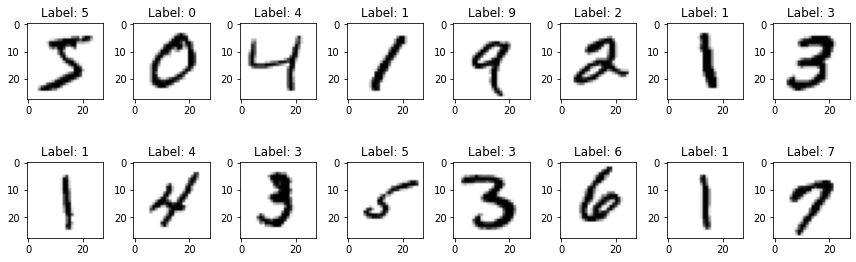

In [ ]:
# Muestra de los datos Cargados
filas = 2
columnas = 2
num = filas * columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [ ]:
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)

X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados 
#(e.g. en lugar de tener como resultado una sola neurona, 
#tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

#### Tratamiento de la información. 


##### ImageDataGenerator de keras
Nos permite la generación de más imágenes a partir de las originales realizando modificaciones a las mismas.

In [ ]:
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
)

datagen.fit(X_entrenamiento)

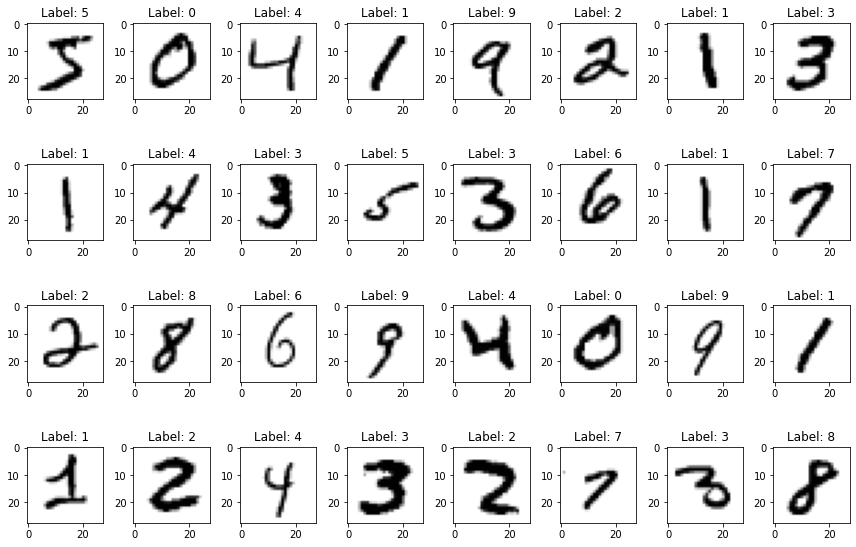

In [ ]:
# Imagenes "Originales"
filas = 4
columnas = 8
num = filas*columnas
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()

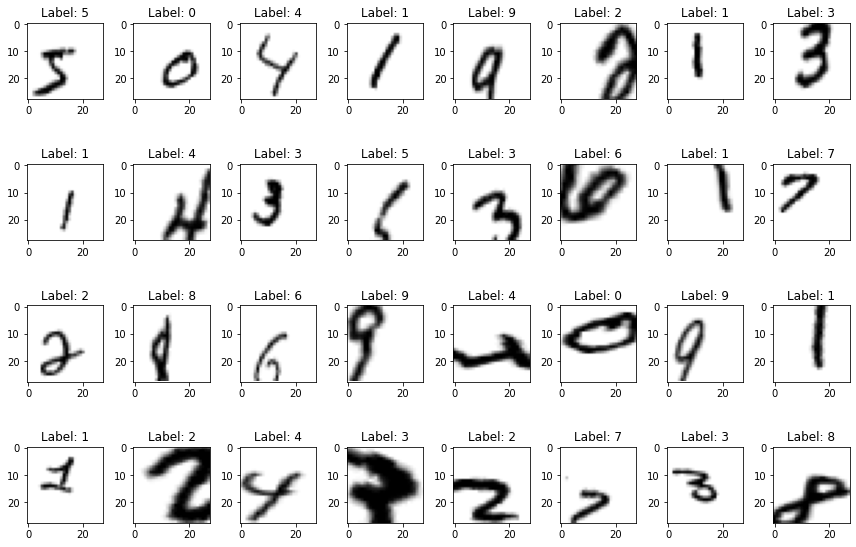

In [ ]:
# Imagenes Transformadas
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

#### Modelo

In [ ]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), # 1 = es blanco y negro 
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 64 filtros
    tf.keras.layers.MaxPooling2D(2,2), # tamaño de la matriz 

    tf.keras.layers.Dropout(0.5), # Esto es para decirle a la red neuronal al probabilidad de que una neurona se “apague” esto se utiliza para hacer que la red neuronal tenga mejor adaptabilidad.

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [ ]:
TAMANO_LOTE = 32

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 69s 36ms/step - loss: 1.2034 - accuracy: 0.5953 - val_loss: 0.1728 - val_accuracy: 0.9536
Epoch 2/60
1875/1875 [==============================] - 68s 36ms/step - loss: 0.7040 - accuracy: 0.7731 - val_loss: 0.1238 - val_accuracy: 0.9628
Epoch 3/60
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5894 - accuracy: 0.8095 - val_loss: 0.0883 - val_accuracy: 0.9709
Epoch 4/60
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5231 - accuracy: 0.8312 - val_loss: 0.0851 - val_accuracy: 0.9757
Epoch 5/60
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4890 - accuracy: 0.8410 - val_loss: 0.1143 - val_accuracy: 0.9635
Epoch 6/60
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4597 - accuracy: 0.8515 - val_loss: 0.0947 - val_accuracy: 0.9700
Epoch 7/60
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4362 - accuracy: 0.8581

#### Exportación de modelo

In [ ]:
#Exportar el modelo al explorador! (Mas detalle de esto en en mi video de exportacion: https://youtu.be/JpE4bYyRADI )
modelo.save('clasificacionNumerosCNN.h5')

#Convertirlo a tensorflow.js
!pip install tensorflowjs

!mkdir carpeta_salida

!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida
!tensorflowjs_converter --input_format keras ./clasificacionNumerosCNN.h5 ./trained_model

     |████████████████████████████████| 64 kB 1.7 MB/s 
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 76, in dispatch_keras_h5_to_tfjs_layers_model_conversion
    raise ValueError('Nonexistent path to HDF5 file: %s' % h5_path)
ValueError: Nonexistent p

## Fuentes

##### La Fuente es el canal de Youtube "Ringa Tech"
##### El video fue https://www.youtube.com/watch?v=4sWhhQwHqug&t=199s

https://rubikscode.net/2019/09/09/integration-of-tensorflow-model-into-angular-application/

https://www.youtube.com/watch?v=4sWhhQwHqug&t=199s

https://programmerclick.com/article/57811926017/